In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

x = np.arange(0, 100, 0.1)
y = 0.5 * np.sin(2*x) - np.cos(x/2)

seq_data = y.reshape(-1, 1)
print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


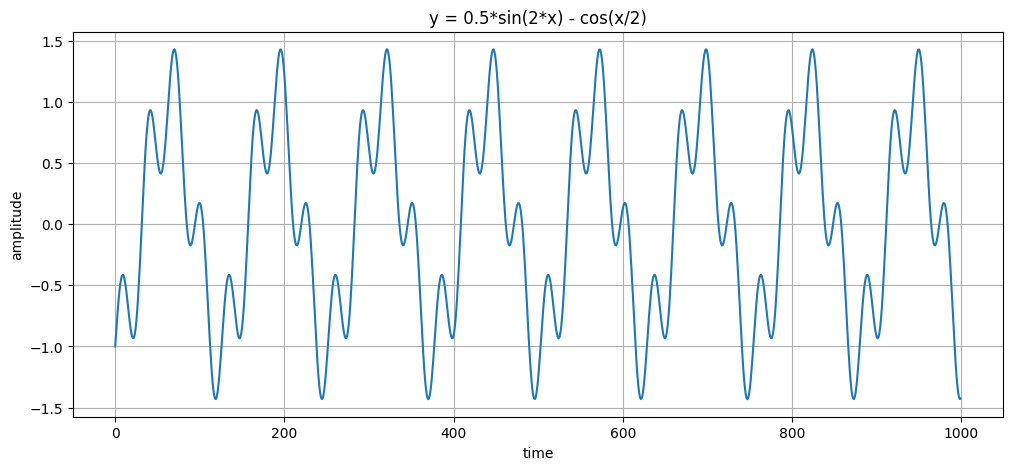

In [3]:
plt.figure(figsize=(12, 5))
plt.title('y = 0.5*sin(2*x) - cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)
plt.grid()
plt.show()

In [4]:
def seq2dataSet(seq, window, horizon):  # horizon은 미래 예측값이다.
    X, Y = [], []
    for i in range(len(seq) - window - horizon + 1):
        X.append(seq[i:(i+window)]), Y.append(seq[i+window+horizon-1])
    return np.array(X), np.array(Y)

In [5]:
wid = 20
hrz = 1
X, Y = seq2dataSet(seq_data, wid, hrz)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [12]:
split_ratio = 0.8
split = int(X.shape[0] * 0.8)

x_train = X[:split]
t_train = Y[:split]
x_test = X[split:]
t_test = Y[split:]

print(x_train.shape, t_train.shape, 
      '\n', x_test.shape, t_test.shape)

(784, 20, 1) (784, 1) 
 (196, 20, 1) (196, 1)


In [7]:
rnn = Sequential()
rnn.add(SimpleRNN(units=128, activation='tanh', 
                  input_shape=x_train[0].shape))    # input_shape=(20, 1)
rnn.add(Dense(1))

In [9]:
rnn.compile(loss='mse', optimizer='Adam', metrics=['mae'])
hist = rnn.fit(x_train, t_train, epochs=100, validation_data=(x_test, t_test))

Epoch 1/100
25/25 [==============================] - 3s 36ms/step - loss: 0.0570 - mae: 0.1775 - val_loss: 0.0065 - val_mae: 0.0621
Epoch 2/100
25/25 [==============================] - 1s 28ms/step - loss: 0.0035 - mae: 0.0474 - val_loss: 0.0018 - val_mae: 0.0347
Epoch 3/100
25/25 [==============================] - 1s 27ms/step - loss: 0.0010 - mae: 0.0248 - val_loss: 5.6190e-04 - val_mae: 0.0172
Epoch 4/100
25/25 [==============================] - 1s 26ms/step - loss: 4.6679e-04 - mae: 0.0170 - val_loss: 3.2971e-04 - val_mae: 0.0131
Epoch 5/100
25/25 [==============================] - 1s 27ms/step - loss: 2.7430e-04 - mae: 0.0126 - val_loss: 2.0143e-04 - val_mae: 0.0111
Epoch 6/100
25/25 [==============================] - 1s 26ms/step - loss: 1.8032e-04 - mae: 0.0102 - val_loss: 1.2492e-04 - val_mae: 0.0082
Epoch 7/100
25/25 [==============================] - 1s 22ms/step - loss: 1.3780e-04 - mae: 0.0088 - val_loss: 1.4166e-04 - val_mae: 0.0092
Epoch 8/100
25/25 [=====================

In [10]:
pred = rnn.predict(x_test)
print(pred.shape)

7/7 [==============================] - 0s 5ms/step
(196, 1)


In [14]:
rand_idx = np.random.randint(0, len(t_test), size=5)

print('random idx =', rand_idx)
print('\npred =', pred.flatten()[rand_idx])
print('label =', t_test.flatten()[rand_idx])

rand_idx = np.random.randint(0, len(t_test), size=5)

print('\n\nrandom idx =', rand_idx)
print('\npred =', pred.flatten()[rand_idx])
print('label =', t_test.flatten()[rand_idx])

random idx = [133 113 115  66 120]

pred = [ 0.51695234  0.7566373   0.8864621  -1.3548099   0.8652766 ]
label = [ 0.51813395  0.75630552  0.88649639 -1.35416279  0.8657532 ]


random idx = [188  74 120 110  86]

pred = [-1.0177056  -1.1600416   0.8652766   0.42193726 -0.43177626]
label = [-1.01735903 -1.15825315  0.8657532   0.42357212 -0.43017063]


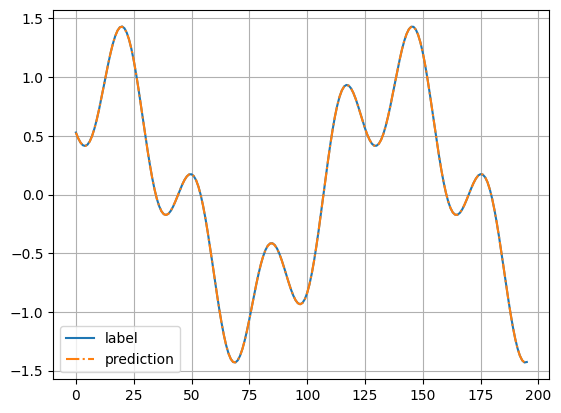

In [20]:
plt.plot(t_test, label='label')
plt.plot(pred, '-.', label='prediction')
plt.legend(loc='best')
plt.grid()
plt.show()